In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
%matplotlib notebook

## 1. Introduction to Matplotlib and basic line

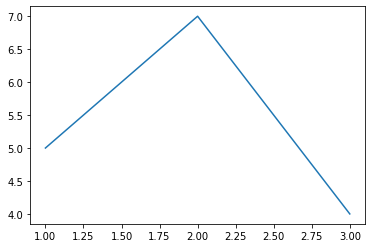

In [3]:
plt.plot([1,2,3],[5,7,4])
plt.show()

## 2. Legends, Titles, and Labels with Matplotlib

In [4]:
x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]

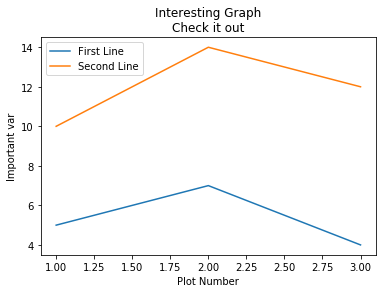

In [7]:
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')

plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

## 3. Bar Charts and Histograms with Matplotlib

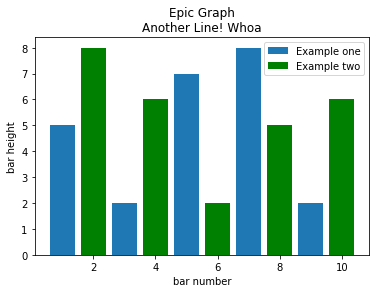

In [8]:
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')

plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')

plt.title('Epic Graph\nAnother Line! Whoa')

plt.show()

No handles with labels found to put in legend.


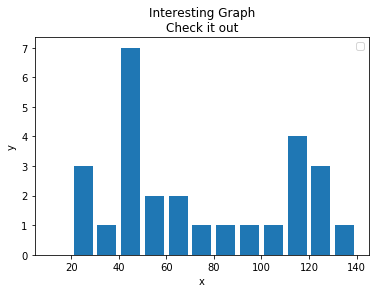

In [26]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]
bins = [x+10 for x in range(0, max(population_ages)+1, 10)]

plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

## 4. Scatter Plots with Matplotlib

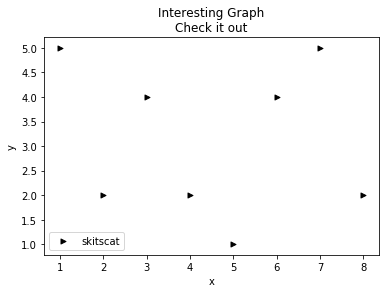

In [38]:
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

plt.scatter(x,y, label='skitscat',
            color='k',   # "k" > black
            s=25,        # Size of marker
            marker=">")  # marker > *, o, ^, >, <, etc

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

## 5. Stack Plots with Matplotlib

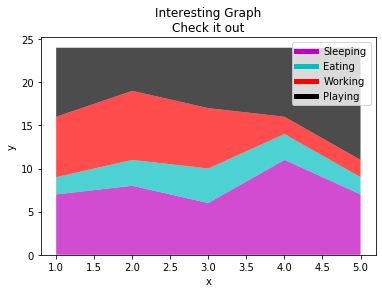

In [11]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

# Set marker
plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)

# Ploting stackplot
plt.stackplot(days, sleeping, eating, working, playing,
              colors=['m','c','r','k'],
              alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

## 6. Pie Charts with Matplotlib

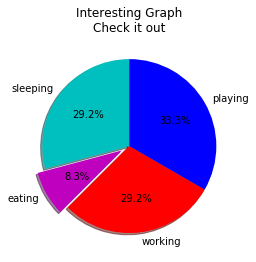

In [14]:
slices = [7, 2, 7, 8]
# slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,      
        shadow= True,         # this shows shadow
        explode=(0,0.1,0,0),  # this shows imbosed
        autopct='%1.1f%%')    # added percentage

plt.title('Interesting Graph\nCheck it out')
plt.show()

## 7. Loading Data from Files for Matplotlib

['1', '10']
['2', '9']
['3', '8']
['5', '7']
['6', '6']
['7', '5']
['8', '4']
['9', '3']
['10', '2']
['11', '1']


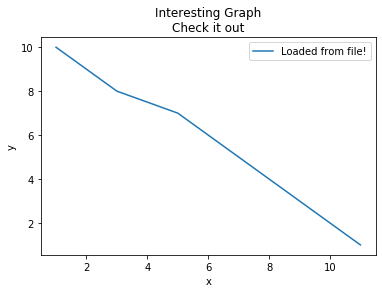

In [15]:
import csv

x = []
y = []

with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        print(row)  # ['1', '10']
        x.append(int(row[0])) # 1
        y.append(int(row[1])) # 10

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

## 8. Data from the Internet for Matplotlib
## 9. Data from the Internet for Matplotlib
## 10. Converting date stamps for Matplotlib
## 11. Basic customization with Matplotlib

/home/hamza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  import sys


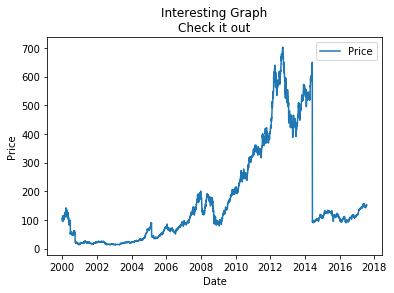

In [20]:
import numpy as np
import urllib                       # accessing internet
import matplotlib.dates as mdates   # onverting date stamps to dates that matplotlib can understand.


def bytespdate2num(fmt, encoding='utf-8'):
    '''Yahoo finance API to times that Matplotlib understands.'''
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
    # print(fmt, "fmt")  # %Y-%m-%d  
    strconverter = mdates.strpdate2num(fmt)
    # print(strconverter, "strconverter")  # <matplotlib.dates.strpdate2num object at 0x7f3b843cb3d0> 
        return strconverter(s)
    return bytesconverter

def graph_data(stock):
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')
        if len(split_line) == 7:
            # print(split_line)  # ['2017-07-26', '153.3500', '153.9300', '153.0600', '153.5000', '153.5000', '12778195.00'] 
            # if "values" in line or "labels" in line: print(line)  # Nothig contained to fall here
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
        date, closep, highp, lowp, openp, adj_closep, volume =   # 6 values per line
                                    np.loadtxt(stock_data,
                                              delimiter=',',
                                              unpack=True,
                                              # %Y = full year. 2015
                                              # %y = partial year 15
                                              # %m = number month
                                              # %d = number day
                                              # %H = hours
                                              # %M = minutes
                                              # %S = seconds
                                              # 12-06-2014
                                              # %m-%d-%Y
                                              converters={0: bytespdate2num('%Y-%m-%d')})
    '''
    print(stock_data[0]) # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    print(date[0])       # 736536.0 
    print(closep[0])     # 153.35
    print(highp[0])      # 153.93
    print(lowp[0])       # 153.06
    print(openp[0])      # 153.5
    print(adj_closep[0]) # 153.5
    print(volume[0])     # 12778195.0
    '''
        
    plt.plot_date(date, closep,'-', label='Price')  # date vs. closep = closing price
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()


graph_data('TSLA')

## 9. Basic customization with Matplotlib

/home/hamza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  import sys


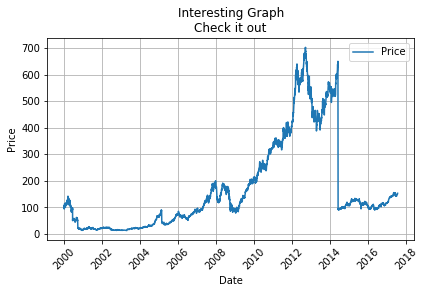

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
    
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    # print(stock_data[0])  # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # print(stock_data)
    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        # print(label)  # Text(0, 0, '')
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5),  # make the labels diagonal

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    # Configuring
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('TSLA')

## 10. Unix Time with Matplotlib

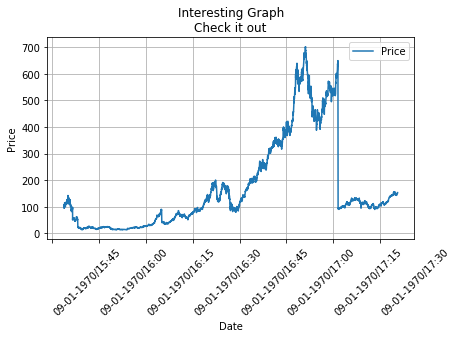

In [7]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.
from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
    
def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
 
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    
    
    ############# To handle unix time
    date_1 = np.vectorize(dt.datetime.fromtimestamp)(date)  # [datetime.datetime(1970, 1, 9, 17, 35, 36) ...
                                                            # datetime.datetime(1970, 1, 9, 17, 35, 35)]
    date = np.vectorize(mdates.date2num)(date_1)        # [719171.73305556 ... 719171.73304398]
    myFmt = mdates.DateFormatter('%d-%m-%Y/%H:%M')      # <matplotlib.dates.DateFormatter object at 0x7fbbdc501550> myFmt

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)   # x labels rotate to 45 degree
    ax1.grid(True)               # color='g', linestyle='-', linewidth=5)

    ax1.xaxis.set_major_formatter(myFmt)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="left")
    plt.legend()
    # Configuring
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('TSLA')

## 11. Colors and Fills with Matplotlib

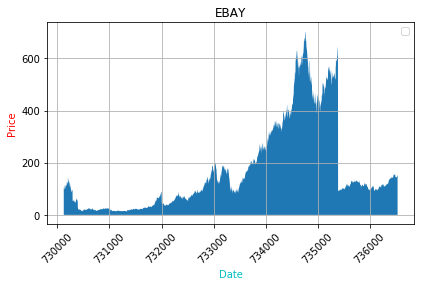

In [16]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.
from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
 
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    
    
    ax1.fill_between(date, 0, closep)     # To fill color 

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)                #, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,200,400,600])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()      # logging module to ignore legend 
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')
    


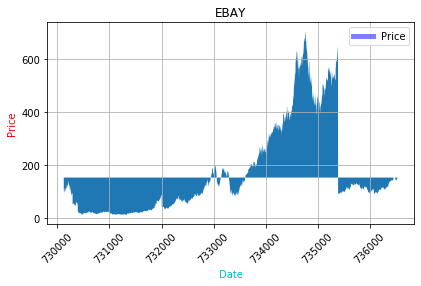

In [23]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.
from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
 
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    '''Now, let's talk about conditional fills. Let's assume the start the graph is where
        we started buying into eBay. From here, if the price goes below this price, we can fill
        up to the original price and then if it goes above, we can fill below.'''
    
    ax1.plot([],[],linewidth=5, label='Price', color='b',alpha=0.5)   # To Lable > loss price (with red)
    ax1.fill_between(date, closep[0], closep)     # To fill color 

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)                #, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')  # cyan > x-label
    ax1.yaxis.label.set_color('r')  # red  > y-label
    ax1.set_yticks([0,200,400,600])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()      # logging module to ignore legend 
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

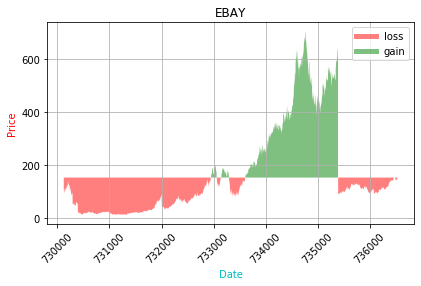

In [22]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.
from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging                                 # To put legend
logging.getLogger().setLevel(logging.CRITICAL)

def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
    
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    '''Now, let's talk about conditional fills. Let's assume the start the graph is where
        we started buying into eBay. From here, if the price goes below this price, we can fill
        up to the original price and then if it goes above, we can fill below.'''
    
    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)   # To Lable > loss price (with red)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)   # To Lable > gain price (with green)

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    '''
    print(closep[0])  # 153.35 > Org price
    print(closep)     # [153.35 151.8 ... 150.58] > list of price ti compare
    '''
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)                #, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')  # cyan > x-label
    ax1.yaxis.label.set_color('r')  # red  > y-label
    ax1.set_yticks([0,200,400,600])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()      # logging module to ignore legend 
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')
    


## 12. Spines and Horizontal Lines with Matplotlib

<IPython.core.display.Javascript object>


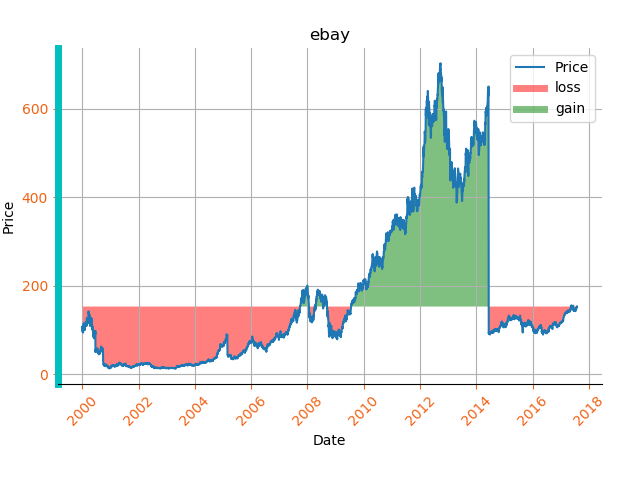

In [33]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.
from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging                                 # To put legend
logging.getLogger().setLevel(logging.CRITICAL)


def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
    
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # whole dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')   # making list > ['2017-07-26', '153.3500', '153.9300', '153.0600', '153.5000', '153.5000', '12778195.00']
        if len(split_line) == 7:  # list size > 7 
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    
    '''Now, let's talk about conditional fills. Let's assume the start the graph is where
        we started buying into eBay. From here, if the price goes below this price, we can fill
        up to the original price and then if it goes above, we can fill below.
    '''
    # To plot main dataset
    ax1.plot_date(date,          # X
                  closep,        # Y 
                  '-',           # Plot by "-"
                  label='Price') # Labeling > Price
    # To labelize
    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)   # To Lable > loss price (with red)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)   # To Lable > gain price (with green)

    # Filling colors  
    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    '''
    print(closep[0])  # 153.35 > Org price
    print(closep)     # [153.35 151.8 ... 150.58] > list of price ti compare
    '''
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)                #, color='g', linestyle='-', linewidth=5)
    # ax1.xaxis.label.set_color('c')  # cyan > x-label
    # ax1.yaxis.label.set_color('r')  # red  > y-label
    ax1.set_yticks([0,200,400,600])
    
    # A spine to a graph is basically the edge of the graph
    ax1.spines['left'].set_color('c')      # Spine edge = left, color=cyan 
    
    # removes the spine to the right and the top spine
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    # modify line width of left spine to make it clear
    ax1.spines['left'].set_linewidth(5)
    
    # x & y scalling with orangish color
    ax1.tick_params(axis='x', colors='#f06215') # orangish
    ax1.tick_params(axis='y', colors='#f06215') # orangish
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()      # logging module to ignore legend 
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

graph_data('ebay')

## 13. Candlestick [open, high, low, close] OHLC   graphs with Matplotlib:
These graphs are used to display time-series stock price information in a condensed form. To do this, we first need a few more imports:

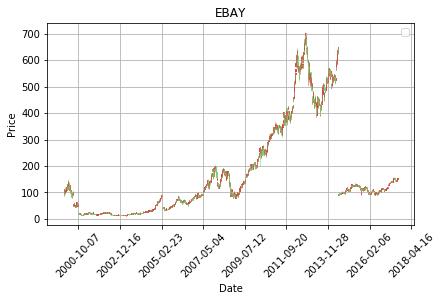

In [7]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.

from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging                                 # To put legend
logging.getLogger().setLevel(logging.CRITICAL)

import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc   # OLHC graphs > pip3 install mpl_finance

def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
    
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # whole dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')   # making list > ['2017-07-26', '153.3500', '153.9300', '153.0600', '153.5000', '153.5000', '12778195.00']
        if len(split_line) == 7:  # list size > 7 
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    
    # Want to reference specific data points.
    x = 0
    y = len(date)  # 4419
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    # print(ohlc) # [(736536.0, 153.5, 153.93, 153.06, 153.35, 12778195.0),  ....
                  # (736535.0, 152.74, 153.84, 151.8, 151.8, 18714400.0)]
        
    candlestick_ohlc(ax1,
                     ohlc,   # [(736536.0, 153.5, 153.93, 153.06, 153.35, 12778195.0),  ....
                             # (736535.0, 152.74, 153.84, 151.8, 151.8, 18714400.0)]
                     width=3,
                     colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    # To handle datetime data on the x axis as it is not in datestamp form.
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    # set the number of x labels > Total x label = 10 .
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)   #, color='g', linestyle='-', linewidth=5)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

graph_data('EBAY')

## 14. Styles with Matplotlib

['Solarize_Light2', 'ggplot', 'seaborn-paper', 'seaborn', 'seaborn-white', 'seaborn-ticks', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-dark-palette', 'bmh', 'seaborn-bright', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-pastel', 'grayscale', 'seaborn-dark', '_classic_test', 'seaborn-poster', 'seaborn-deep', 'dark_background', 'seaborn-notebook', 'seaborn-talk', 'seaborn-muted', 'fast', 'seaborn-colorblind', 'classic']


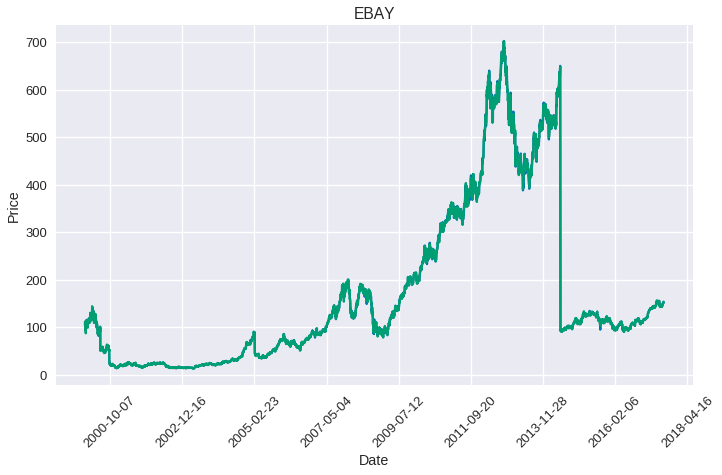

In [16]:
import matplotlib.pyplot as plt             # To plot graph
import numpy as np
import urllib                               # accessing internet
import datetime as dt                       # To handle date
import matplotlib.dates as mdates           # onverting date stamps to dates that matplotlib can understand.

from pandas.plotting import register_matplotlib_converters    # to handle date in ploting
import logging                                 # To put legend
logging.getLogger().setLevel(logging.CRITICAL)

import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc   # OLHC graphs > pip3 install mpl_finance
from matplotlib import style

def bytespdate2num(fmt):
    '''To convert String date into unix time 
    b'2017-07-26' >>> 735793.0 
    '''
    return mdates.datestr2num(fmt.decode('utf-8'))

def graph_data(stock):

    fig = plt.figure()                   # To modify fig
    ax1 = plt.subplot2grid((1,1), (0,0)) # (1,1) > 1row x 1col grid, (0,0) > starting point
    
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode() # whole dataset
    # ate,Open,High,Low,Close,Adjusted_close,Volume
    # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
    # 2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
    
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]: # whole dataset except header
        # print(line)   # 2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00 
        split_line = line.split(',')   # making list > ['2017-07-26', '153.3500', '153.9300', '153.0600', '153.5000', '153.5000', '12778195.00']
        if len(split_line) == 7:  # list size > 7 
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      converters={0: bytespdate2num})
    
    # Want to reference specific data points.
    x = 0
    y = len(date)  # 4419
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    # print(ohlc) # [(736536.0, 153.5, 153.93, 153.06, 153.35, 12778195.0),  ....
                  # (736535.0, 152.74, 153.84, 151.8, 151.8, 18714400.0)]
        
#     candlestick_ohlc(ax1,
#                      ohlc,   # [(736536.0, 153.5, 153.93, 153.06, 153.35, 12778195.0),  ....
#                              # (736535.0, 152.74, 153.84, 151.8, 151.8, 18714400.0)]
#                      width=3,
#                      colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax1.plot(date,closep)
    ax1.plot(date,openp)
    
    # To handle datetime data on the x axis as it is not in datestamp form.
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    # set the number of x labels > Total x label = 10 .
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)   #, color='g', linestyle='-', linewidth=5)
    
    # style.use('fivethirtyeight')
    # style.use('seaborn-talk')
    # style.use('grayscale')
    # style.use('tableau-colorblind10')
    # style.use('seaborn-ticks')
    # style.use('seaborn-darkgrid')
    # style.use('seaborn-colorblind')
    style.use('seaborn-deep')
    print(plt.style.available)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

graph_data('EBAY')

## 15. Live Graphs with Matplotlib

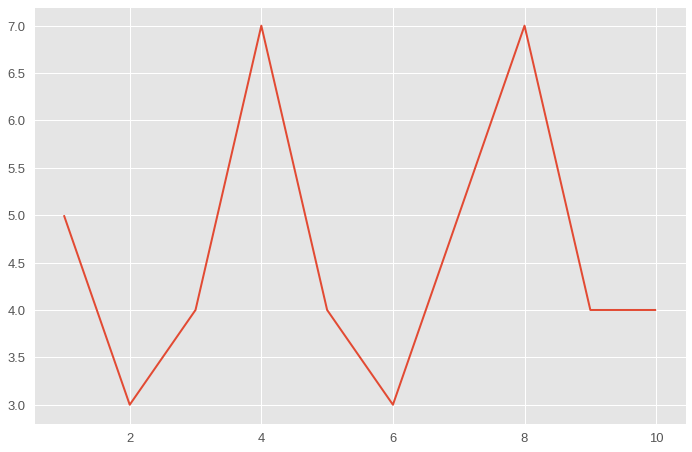

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()